# Exploratory Data Analysis - Ofertas Relámpago

## 📖 Glosario de Términos Clave

| Término | Definición |
|---------|------------|
| **Conversión** | % de ofertas que lograron al menos 1 venta |
| **Zombie** | Oferta que NO vendió ninguna unidad (0 ventas) |
| **Sellout** | Oferta que agotó el 100% de su stock comprometido |
| **Oversell** | Oferta que vendió MÁS unidades de las que tenía en stock (sobreventa) |
| **Sell-Through Rate (STR)** | % del stock comprometido que se vendió (0% = zombie, 100% = sellout, >100% = oversell) |
| **GMV** | Gross Merchandise Value = valor total de las ventas en dinero |
| **Stock comprometido** | Unidades disponibles para vender durante la oferta |
| **Ticket promedio** | Precio promedio por unidad vendida (GMV / cantidad vendida) |
| **Free Shipping** | Envío gratis incluido en la oferta |

---

## 📊 Descripción del Dataset

| Columna | Descripción | Tipo |
|---------|-------------|------|
| `OFFER_START_DATE` | Fecha de inicio de la oferta | date |
| `OFFER_START_DTTM` | Timestamp exacto de inicio | datetime |
| `OFFER_FINISH_DTTM` | Timestamp exacto de fin | datetime |
| `OFFER_TYPE` | Tipo de oferta (lightning_deal) | categorical |
| `INVOLVED_STOCK` | Unidades comprometidas para la oferta | int |
| `REMAINING_STOCK_AFTER_END` | Stock restante al finalizar | int |
| `SOLD_AMOUNT` | Monto total vendido (GMV) | float |
| `SOLD_QUANTITY` | Cantidad de unidades vendidas | float |
| `ORIGIN` | Origen del producto (A=Ads?, NA=No Ads?) | categorical |
| `SHIPPING_PAYMENT_TYPE` | Tipo de envío (none, free_shipping) | categorical |
| `DOM_DOMAIN_AGG1` | Categoría agregada nivel 1 | categorical |
| `VERTICAL` | Vertical del negocio | categorical |
| `DOMAIN_ID` | ID específico del dominio/categoría | categorical |

---

## Índice de Análisis

1. **Setup y Carga de Datos**
2. **Temática 1:** Performance y Resultados
3. **Temática 2:** Análisis Temporal
4. **Temática 3:** Categorías y Dominios
5. **Temática 4:** Pricing, GMV y Velocidad
6. **Temática 5:** Stock y Operaciones
7. **Temática 6:** Estrategia e Impacto
8. **Análisis Derivados**
9. **Conclusiones**

## 1. Setup y Carga de Datos

In [1]:
from utils_eda import (
    OfertasEDA,
    PerformanceGeneral, AnalisisZombies,
    AnalisisTemporal,
    AnalisisCategoria,
    AnalisisPricing, AnalisisVelocidad,
    AnalisisStock,
    AnalisisEnvio, AnalisisNegocio
)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [2]:
# Cargar y preparar datos
eda = OfertasEDA('ofertas_relampago.csv')
df = eda.df
print(f"Dataset: {len(df):,} ofertas, {df.columns.size} columnas")
df.head(3)

Dataset: 48,746 ofertas, 36 columnas


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,duration_hours,duration_minutes,start_hour,day_of_week,day_name,week,month,is_weekend,units_sold_by_stock,sell_through_rate,has_sales,is_sold_out,has_oversell,oversell_qty,avg_ticket,gmv_per_committed_unit,gmv_per_hour,units_per_hour,has_free_shipping,is_origin_A,stock_bucket,duration_bucket,str_bucket
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,7.05,422.72,16,1,Tuesday,25,6,False,6,1.50,True,True,True,2,0.79,1.18,0.67,0.85,False,True,1-5,6-8h,>100% (oversell)
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.00,360.03,13,1,Tuesday,25,6,False,0,0.00,False,False,False,0,NaN,NaN,NaN,0.00,True,False,1-5,6-8h,0% (zombie)
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,6.00,360.02,7,1,Tuesday,25,6,False,3,0.20,True,False,False,0,3.58,0.72,1.79,0.50,False,False,11-15,6-8h,1-25%


---

# TEMÁTICA 1: Performance y Resultados

## Preguntas:
1. ¿Cuál es la tasa de éxito general de las ofertas relámpago?
2. ¿Qué porcentaje son "zombies" (sin ventas)?
3. ¿Qué porcentaje logra sellout completo vs cuántos tienen oversell?
4. ¿Cómo se distribuye el sell-through rate?
5. ¿Qué categorías concentran más ofertas fallidas (zombies)?
6. ¿Cuánto GMV potencial se pierde debido a los zombies?

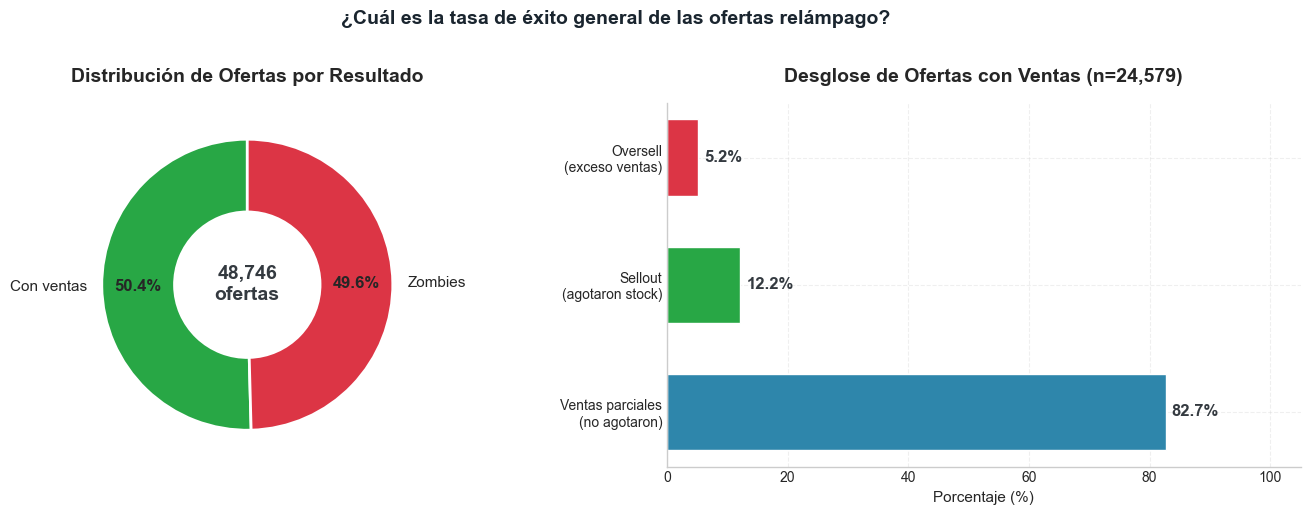


📊 DISTRIBUCIÓN DE OFERTAS
Total ofertas: 48,746
------------------------------------------------------------
✅ Con ventas:    24,579 (50.4%)
❌ Zombies:       24,167 (49.6%)
------------------------------------------------------------
📈 ZOOM: De las 24,579 ofertas con ventas:
   📦 Ventas parciales: 20,317 (82.7%)
   🎯 Sellout exacto:   2,989 (12.2%)
   ⚠️  Oversell:        1,273 (5.2%)


In [3]:
# 1.1 Gráfico de tasas de éxito
PerformanceGeneral.plot_success_rates(df)

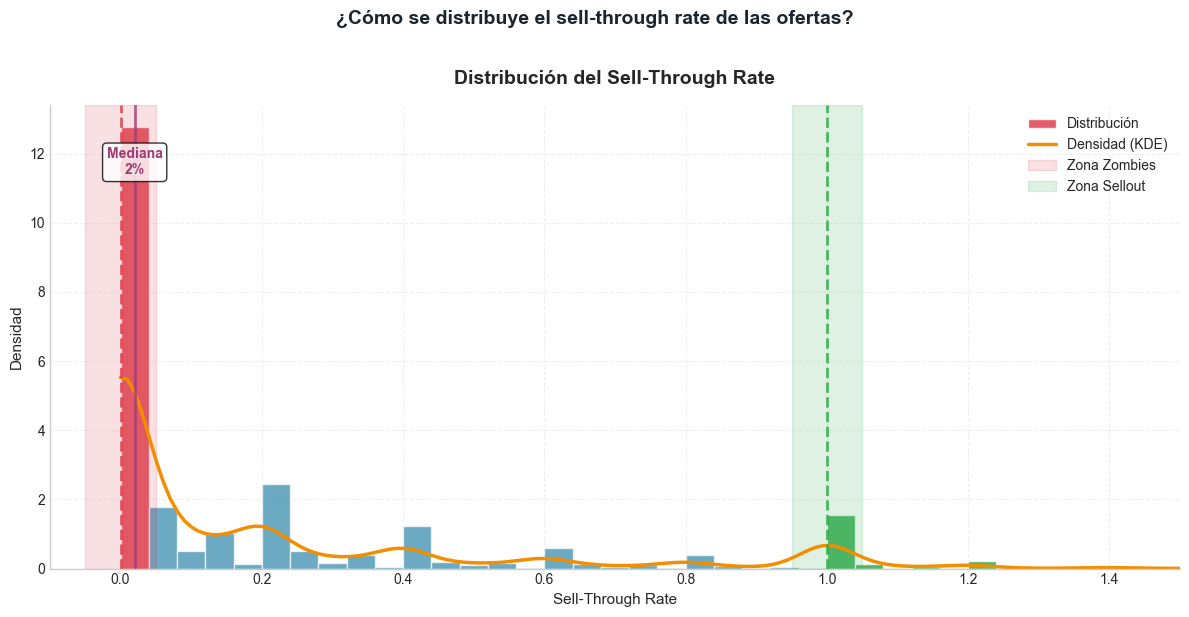

In [4]:
# 1.2 Histograma del Sell-Through Rate
PerformanceGeneral.plot_sell_through_histogram(df)

### Análisis de Ofertas Zombie

Las ofertas "zombie" son aquellas que no generan ninguna venta durante su período activo. Entender su distribución y el impacto que tienen es crucial para optimizar el programa.

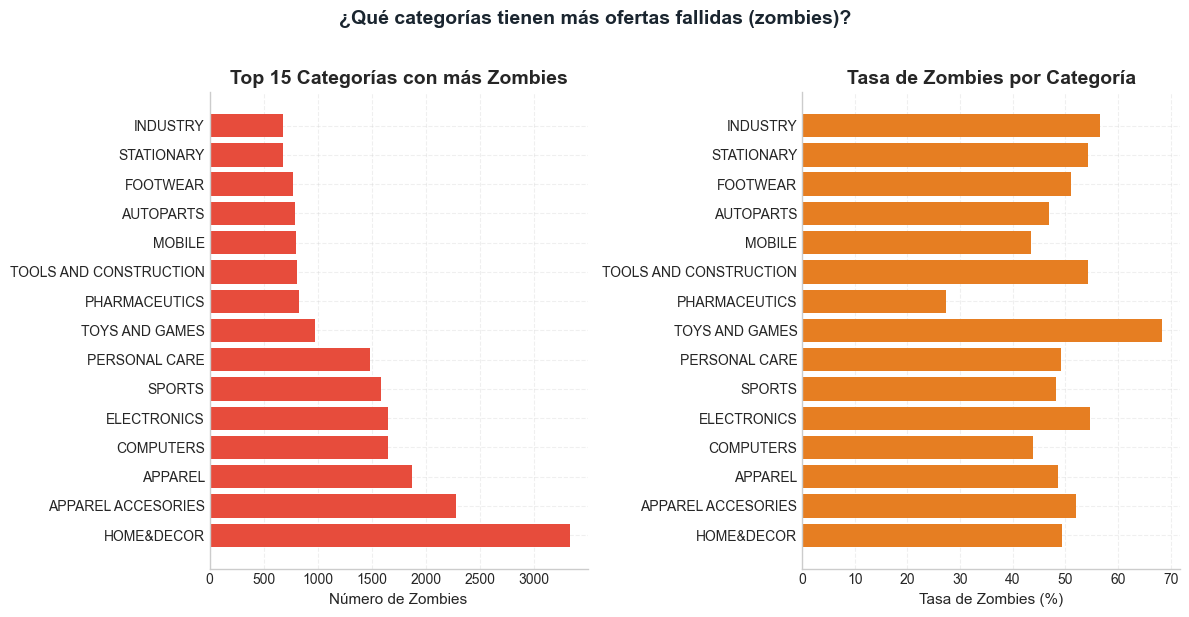


💀 ANÁLISIS DE OFERTAS ZOMBIES (SIN VENTAS)
Total zombies:         24,167 (49.6%)
Stock desperdiciado:   387,473 unidades
Horas de slot perdidas: 131,997 hrs
------------------------------------------------------------
📋 Top 15 categorías con más zombies:
   1. HOME&DECOR: 3,332 (49.4%)
   2. APPAREL ACCESORIES: 2,280 (52.0%)
   3. APPAREL: 1,871 (48.5%)
   4. COMPUTERS: 1,652 (43.8%)
   5. ELECTRONICS: 1,649 (54.6%)
   6. SPORTS: 1,589 (48.3%)
   7. PERSONAL CARE: 1,483 (49.2%)
   8. TOYS AND GAMES: 975 (68.4%)
   9. PHARMACEUTICS: 831 (27.4%)
   10. TOOLS AND CONSTRUCTION: 810 (54.3%)
   ... y 5 más


In [5]:
# 1.3 Zombies por categoría
AnalisisZombies.plot_zombie_by_category(df)

In [6]:
# 1.4 GMV potencial perdido en zombies
AnalisisZombies.estimate_lost_gmv(df)

💀 GMV POTENCIAL PERDIDO EN ZOMBIES
📊 Ofertas zombie analizadas:     24,167
✅ Ofertas exitosas (referencia): 24,579
------------------------------------------------------------
💰 GMV potencial perdido:         $3,669,114.12
📈 GMV promedio en exitosas:      $51.21
🔄 GMV potencial alternativo:     $1,237,565.43


{'gmv_potencial_perdido': 3669114.1219934127,
 'gmv_promedio_exitosas': 51.20889783961919,
 'gmv_potencial_alternativo': 1237565.434090077}

Font 'default' does not have a glyph for '\U0001f4a1' [U+1f4a1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f4a1' [U+1f4a1], substituting with a dummy symbol.


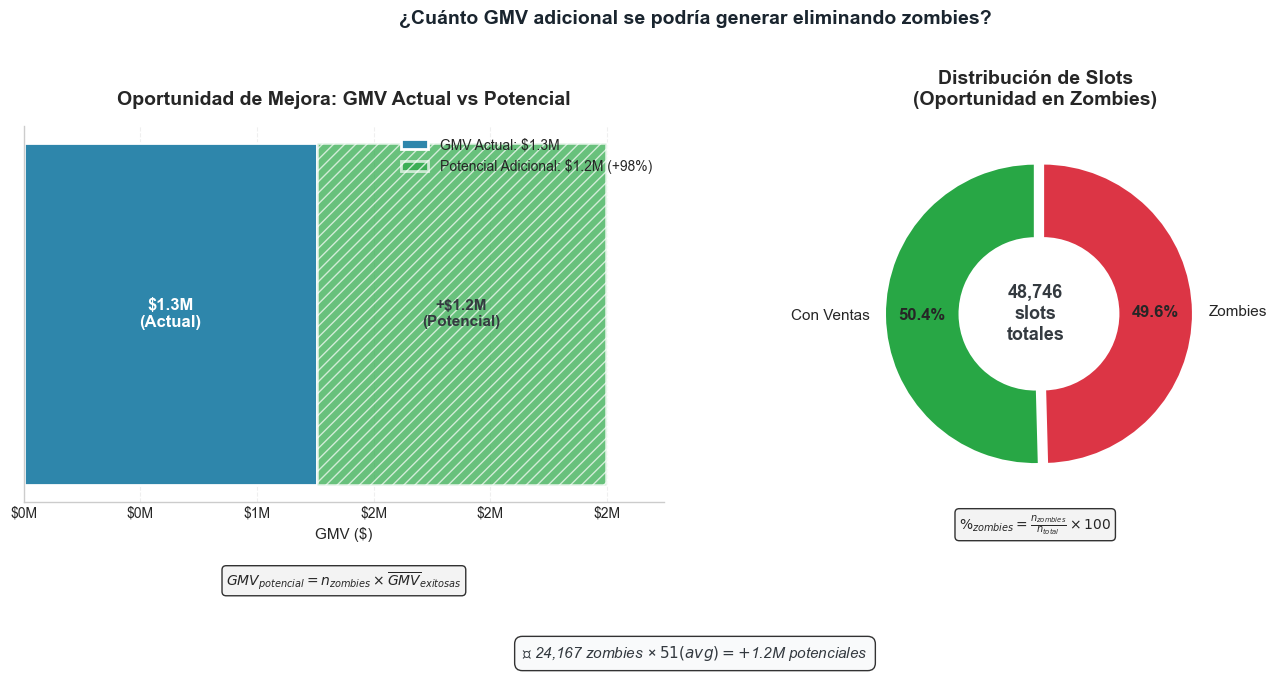


💰 PRODUCTIVIDAD DEL PROGRAMA
GMV Actual:              $1,258,664
GMV promedio exitosas:   $51.21
Slots zombie:            24,167
------------------------------------------------------------
📈 GMV Potencial Adicional: $1,237,565
📈 Incremento potencial:    98.3%
------------------------------------------------------------
💡 Si eliminamos zombies y los reemplazamos por ofertas promedio,
   podríamos incrementar el GMV en $1,237,565


In [7]:
# 1.5 Productividad del programa y oportunidad en zombies
AnalisisNegocio.plot_productivity(df)

Font 'default' does not have a glyph for '\U0001f4a1' [U+1f4a1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f4a1' [U+1f4a1], substituting with a dummy symbol.


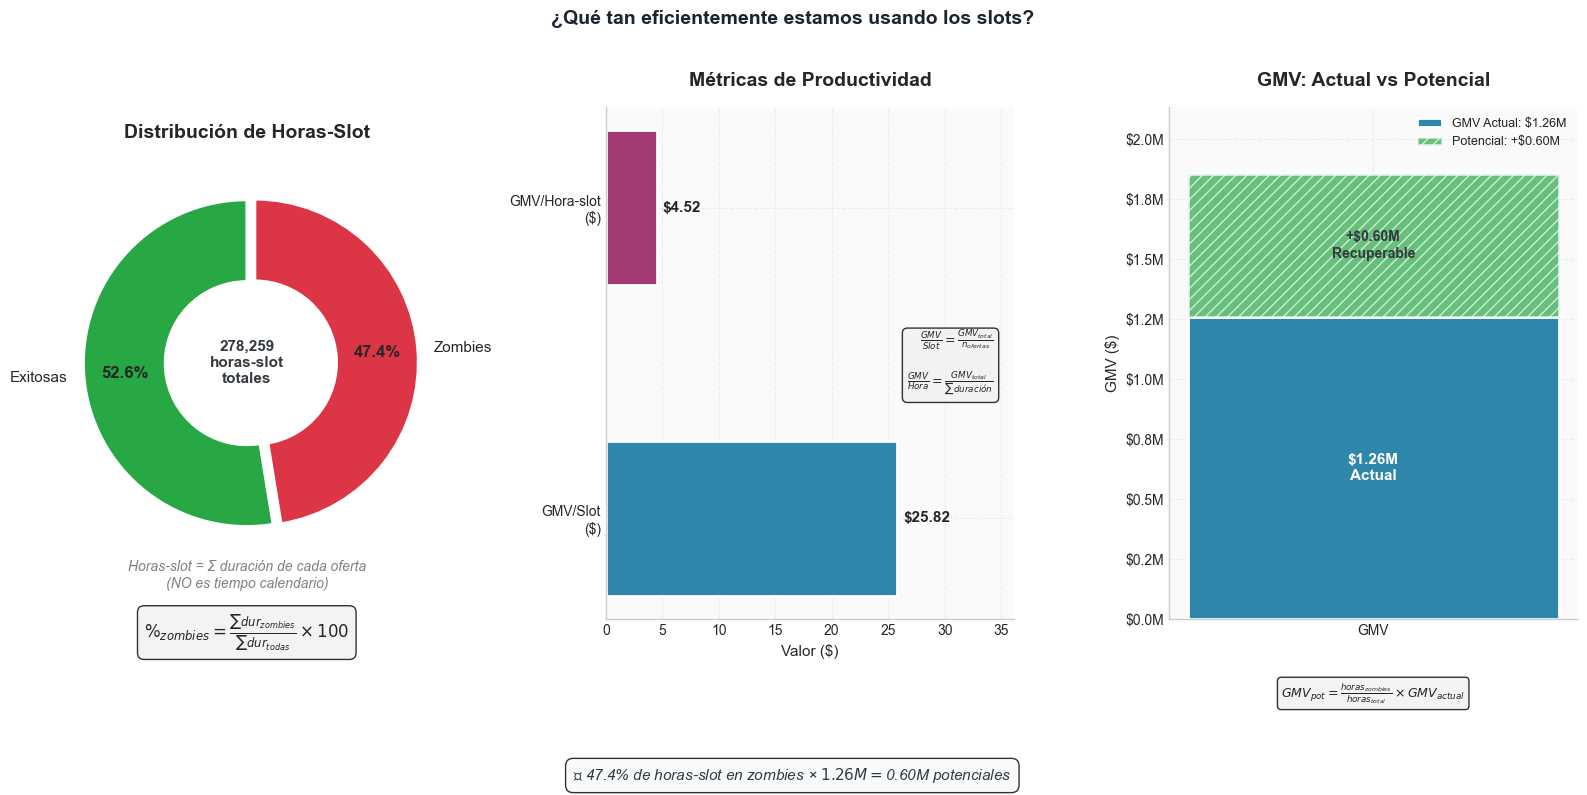


⏱️  EFICIENCIA DE SLOTS (Horas-Slot = Σ duración de ofertas)
Total Ofertas:             48,746
  - Exitosas:              24,579
  - Zombies:               24,167
----------------------------------------------------------------------
Total Horas-Slot:          278,259 (suma de duraciones)
  - En exitosas:           146,262 (52.6%)
  - En zombies:            131,997 (47.4%)
----------------------------------------------------------------------
Duración promedio exitosa: 6.0 horas
Duración promedio zombie:  5.5 horas
----------------------------------------------------------------------
GMV Total:                 $1,258,664
GMV por Slot:              $25.82
GMV por Hora-Slot:         $4.52
----------------------------------------------------------------------
📈 GMV Potencial:          $597,070
NOTA: Horas-slot NO es tiempo calendario. Las ofertas pueden
      correr en paralelo, por eso la suma supera las horas del día.


In [8]:
# 1.6 Eficiencia del slot de tiempo
AnalisisNegocio.plot_slot_efficiency(df)

**Ejemplo:
Oferta A: 6 horas (de 10am a 4pm)
Oferta B: 8 horas (de 12pm a 8pm) ← se superpone con A
Oferta C: 4 horas (de 2pm a 6pm) ← se superpone con A y B
Horas-slot totales = 6 + 8 + 4 = 18 horas (aunque en el calendario solo pasaron 10 horas de 10am a 8pm)
Si A y C son zombies (12 horas-slot) y B tiene ventas (8 horas-slot):
% horas zombies = 12/18 = 67%**

## Conclusión Temática 1:

### Tasa de éxito general
- **Solo el 50.4% de las ofertas generan ventas.** El 49.6% son 'zombies' sin ninguna venta.
- De las 24,579 ofertas con ventas:
  - **82.7% son ventas parciales** (no agotan stock)
  - **12.2% logran sellout exacto** (agotan el 100% del stock)
  - **5.2% tienen oversell** (venden más de lo comprometido - riesgo operativo)

### Distribución del Sell-Through Rate
- La distribución es bimodal: hay una concentración en 0% (zombies) y otra en el rango 50-100%.
- Solo ~17% de las ofertas con ventas alcanzan STR ≥100%.

### Categorías más problemáticas
- Las categorías con mayor número absoluto de zombies requieren revisión de criterios de selección.
- Algunas categorías tienen tasas de zombie superiores al 60%, indicando problemas estructurales.

### Impacto económico de los zombies
- **GMV potencial perdido: ~$3.7M** (si zombies vendieran al ticket promedio de su categoría)
- **~47% de las horas-slot se destinan a zombies** (ineficiencia de tiempo/exposición)
- **Oportunidad de mejora:** Convertir zombies en ofertas promedio incrementaría el GMV en ~98%.

### Insight clave
El programa tiene un problema de selección: casi la mitad de las ofertas no generan valor. Mejorar los criterios de entrada podría duplicar el GMV sin aumentar slots.

---

# TEMÁTICA 2: Análisis Temporal

## Preguntas:
- ¿Cuál es el mejor horario para lanzar ofertas?
- ¿Cuál es la duración óptima?
- ¿Hay patrones por día de la semana?

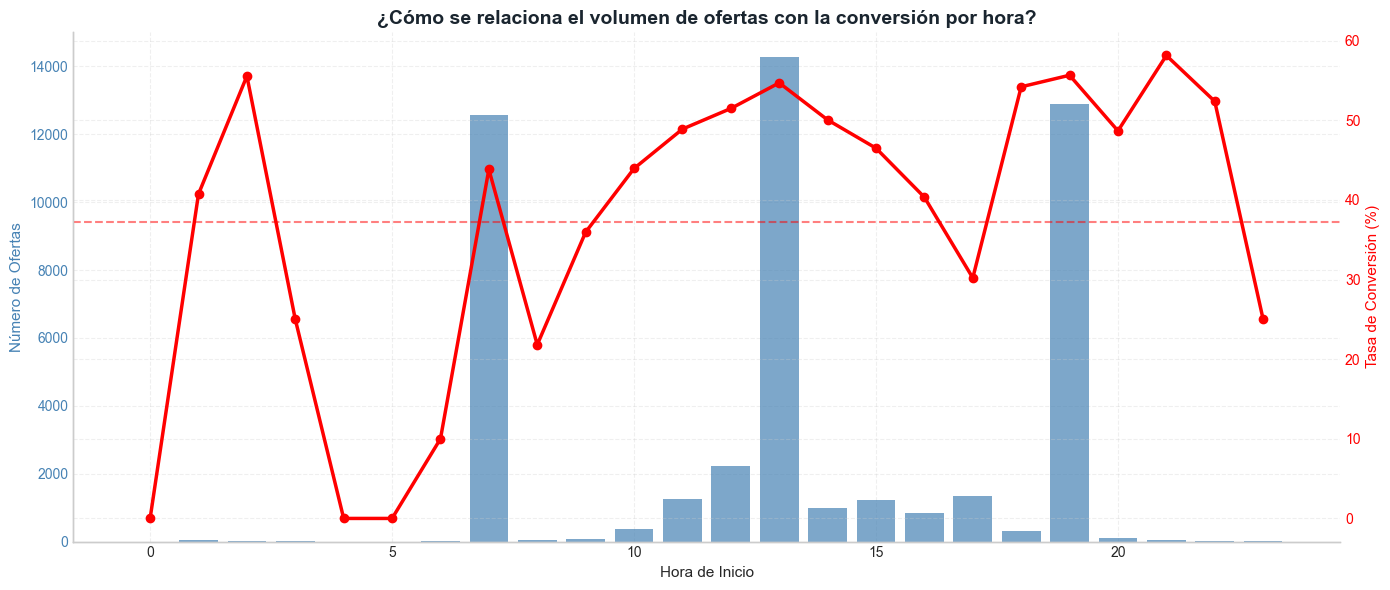


⏰ VOLUMEN vs CONVERSIÓN POR HORA (DUAL AXIS)
Total ofertas: 48,746
Promedio conversión: 37.2%
------------------------------------------------------------
🏆 Mejor hora (conversión):  21:00 (58.1%)
📉 Peor hora (conversión):   0:00 (0.0%)
📊 Hora más activa:          13:00 (14,287 ofertas)
📊 Hora menos activa:        0:00 (1 ofertas)
------------------------------------------------------------
✅ Horas sobre promedio: 1:00, 2:00, 7:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 18:00, 19:00, 20:00, 21:00, 22:00


In [9]:
AnalisisTemporal.plot_dual_axis_hourly(df)

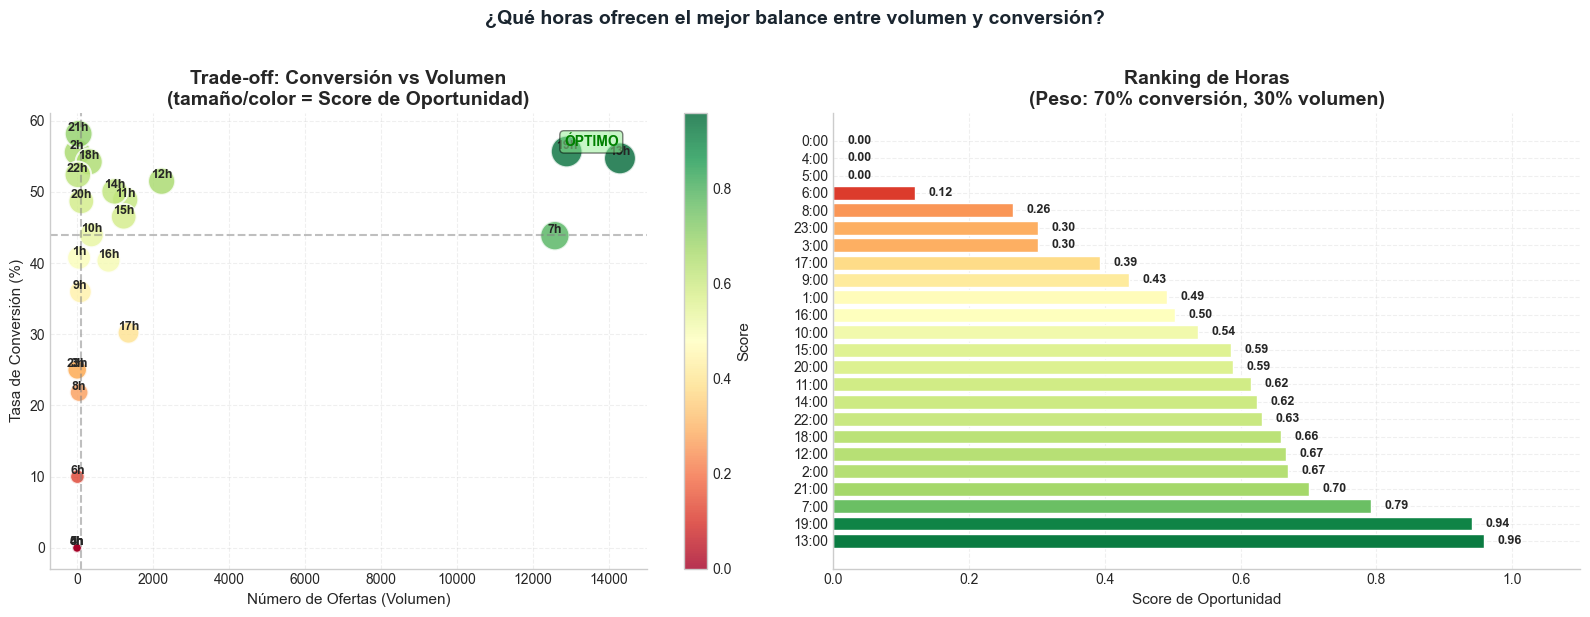


🎯 SCORE DE OPORTUNIDAD POR HORA
   Fórmula: 70% × Conversión_norm + 30% × Volumen_norm

🏆 MEJORES HORAS (balance conversión + volumen):
   1. 13:00 → Score: 0.959 (Conv: 54.7%, Ofertas: 14,287)
   2. 19:00 → Score: 0.941 (Conv: 55.7%, Ofertas: 12,884)
   3. 7:00 → Score: 0.792 (Conv: 43.8%, Ofertas: 12,574)

⚠️  HORAS A EVITAR:
   • 5:00 → Score: 0.000 (Conv: 0.0%, Ofertas: 1)
   • 4:00 → Score: 0.000 (Conv: 0.0%, Ofertas: 1)
   • 0:00 → Score: 0.000 (Conv: 0.0%, Ofertas: 1)

----------------------------------------------------------------------
💡 INTERPRETACIÓN:
   • Score alto = buena conversión Y volumen representativo
   • Score bajo = mala conversión O pocas ofertas (no confiable)
   • Ajusta weight_conversion para priorizar calidad vs cantidad


In [10]:
AnalisisTemporal.plot_hourly_opportunity_score(df, weight_conversion=0.7)

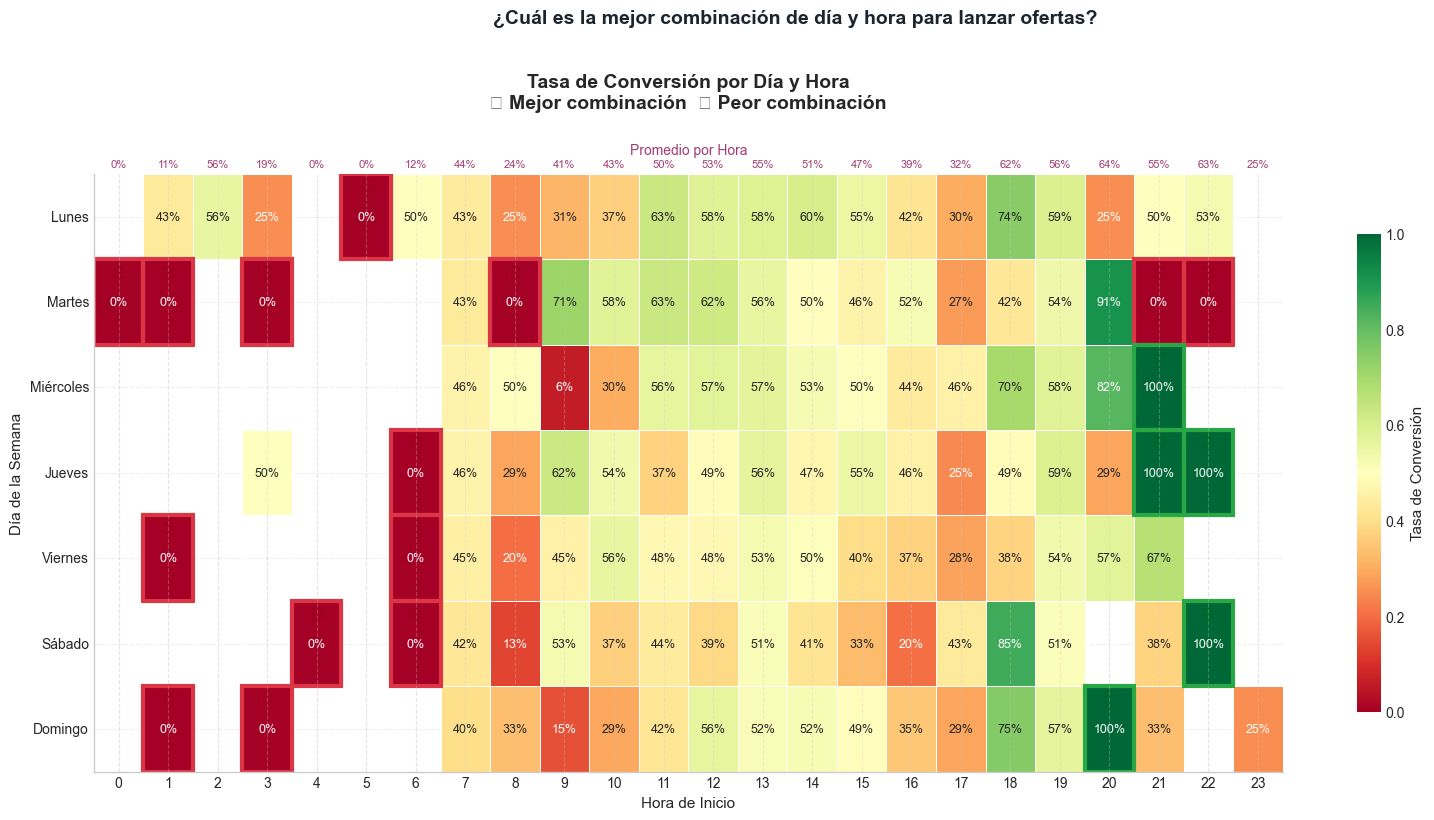


🗓️ HEATMAP: CONVERSIÓN POR DÍA Y HORA
🏆 Mejor hora (promedio):    20:00 (63.9%)
🏆 Mejor día (promedio):     Wednesday (53.5%)
📉 Peor hora (promedio):     0:00 (0.0%)
📉 Peor día (promedio):      Tuesday (37.7%)
------------------------------------------------------------
🌟 Mejor combo:  Wednesday 21:00 (100.0%)
💀 Peor combo:   Monday 5:00 (0.0%)


In [11]:
# 2.3 Heatmap día x hora
AnalisisTemporal.plot_hourly_heatmap(df)

**La tasa de conversion funciona mejor de 18-23hs en general, mientras que de 0-6hs no tiene el impacto que nos gustaria**

In [12]:
# 2.4 Performance por día de la semana
AnalisisTemporal.get_daily_performance(df)

,total_ofertas,con_ventas,tasa_conversion,tasa_sellout,gmv_total,sell_through_rate
day_name,,,,,,
Monday,6307,3313,0.53,0.09,"197,662.01",0.22
Tuesday,7322,3711,0.51,0.10,"218,777.41",0.22
Wednesday,6718,3600,0.54,0.10,"204,655.07",0.23
Thursday,7286,3785,0.52,0.09,"194,487.42",0.22
Friday,7773,3824,0.49,0.08,"177,677.12",0.20
Saturday,7506,3495,0.47,0.08,"155,812.90",0.19
Sunday,5834,2851,0.49,0.08,"109,591.57",0.20


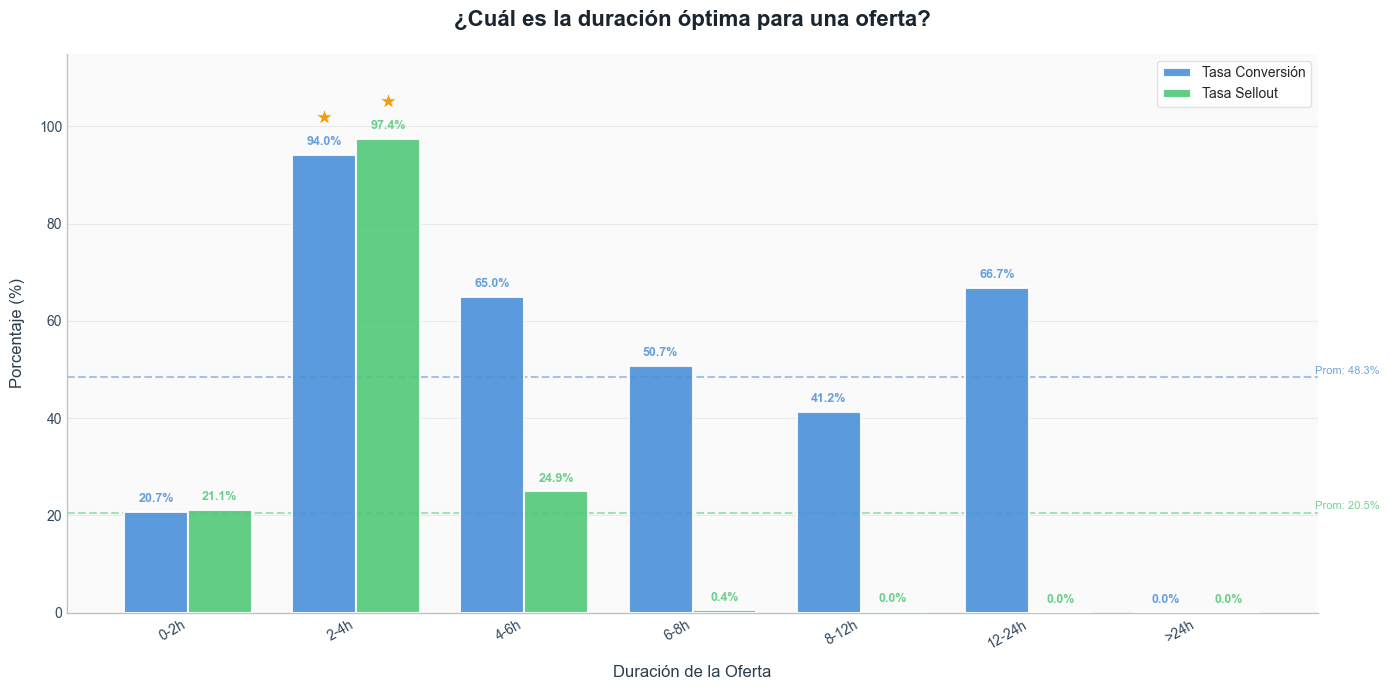


⏱️ PERFORMANCE POR DURACIÓN DE OFERTA
Total ofertas: 47,432
------------------------------------------------------------
🏆 Mejor duración (conversión): 2-4h (94.0%)
🎯 Mejor duración (sellout):    2-4h (97.4%)
📊 Duración más común:          6-8h (31,227 ofertas)
------------------------------------------------------------
📋 Resumen por duración:
   0-2h: Conv 20.7% | Sellout 21.1%
   2-4h: Conv 94.0% | Sellout 97.4%
   4-6h: Conv 65.0% | Sellout 24.9%
   6-8h: Conv 50.7% | Sellout 0.4%
   8-12h: Conv 41.2% | Sellout 0.0%
   12-24h: Conv 66.7% | Sellout 0.0%
   >24h: Conv 0.0% | Sellout 0.0%


,total_ofertas,tasa_conversion,tasa_sellout,sell_through_rate,gmv_por_hora
duration_bucket,,,,,
0-2h,3276,0.21,0.21,0.25,43.84
2-4h,1480,0.94,0.97,1.08,20.09
4-6h,8018,0.65,0.25,0.39,7.79
6-8h,31227,0.51,0.00,0.14,6.59
8-12h,3256,0.41,0.00,0.06,18.90
12-24h,174,0.67,0.00,0.15,1.47
>24h,1,0.00,0.00,0.00,NaN


In [13]:
# 2.5 Gráfico de análisis de duración
AnalisisTemporal.plot_duration_analysis(df)
# 2.6 Performance por duración
AnalisisTemporal.get_duration_performance(df)

**En resumen: Las ofertas relámpago funcionan mejor cuando son realmente "relámpago". La duración de 2-4 horas maximiza tanto conversión como sellout, mientras que duraciones mayores a 6 horas diluyen el efecto de urgencia y no logran agotar inventario.
Para 0-2hs lo mas probable es que la publicacion, no tenga tiempo suficiente para que los buyers descubran las publicaciones**

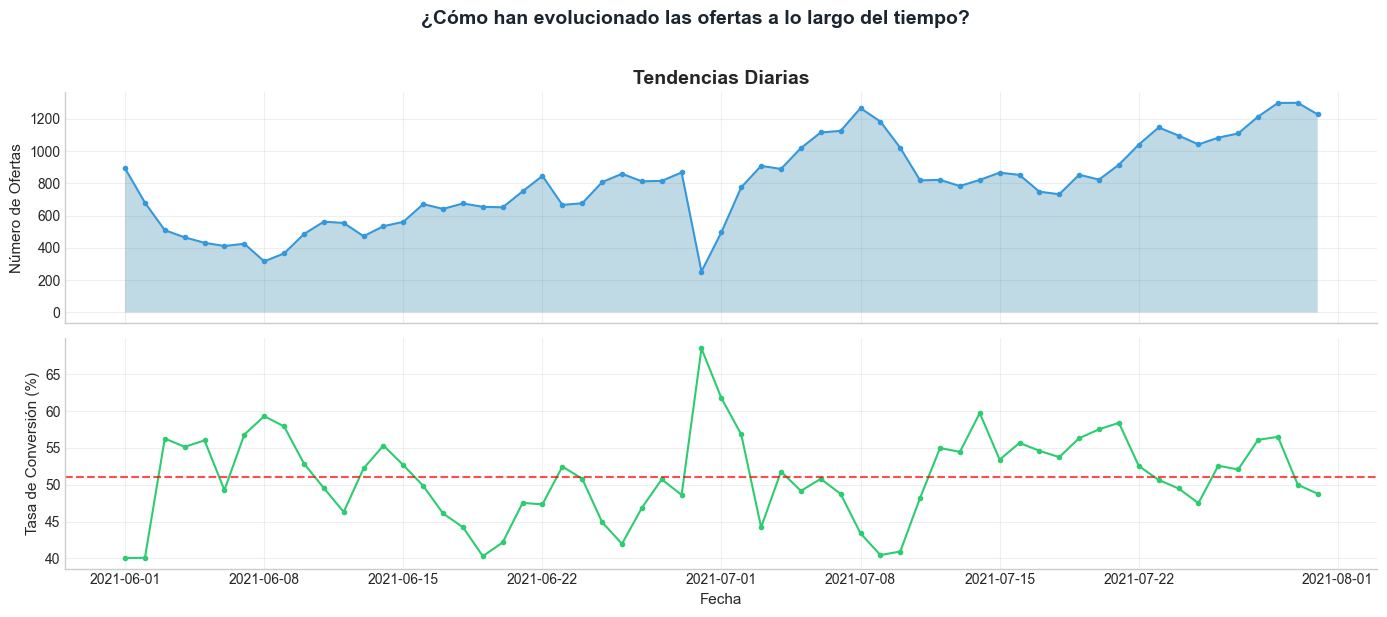


📅 TENDENCIAS DIARIAS
Período: 2021-06-01 a 2021-07-31
Total días: 61
------------------------------------------------------------
📈 Mejor día (conversión):  2021-06-30 (68.5%)
📉 Peor día (conversión):   2021-06-01 (40.0%)
📊 Día más activo:          2021-07-30 (1,300 ofertas)
------------------------------------------------------------
Promedio ofertas/día: 799
Promedio conversión:  51.0%
GMV total período:    $1,258,664


In [14]:
# 2.7 Tendencias diarias
AnalisisTemporal.plot_daily_trends(df)

---

# TEMÁTICA 3: Categorías y Dominios

## Preguntas:
- ¿Qué categorías tienen mejor performance?
- ¿Cuántos dominios generan el 80% del GMV? (Pareto)
- ¿Hay dominios problemáticos que deberíamos excluir?

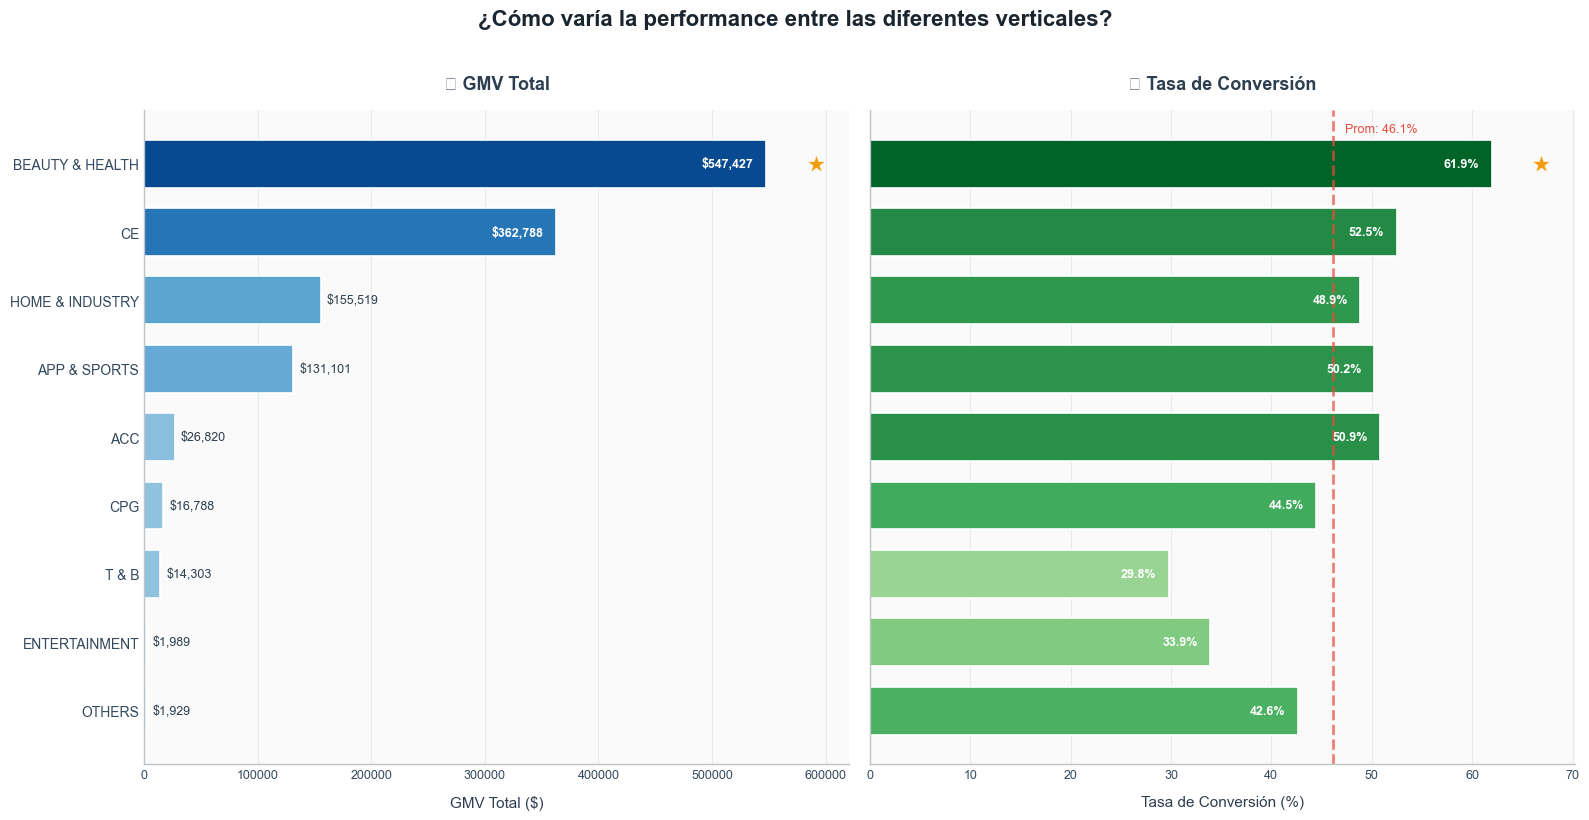


📦 PERFORMANCE POR VERTICAL
Total verticales: 9
------------------------------------------------------------
💰 Mayor GMV:           BEAUTY & HEALTH ($547,427)
🏆 Mayor conversión:    BEAUTY & HEALTH (61.9%)
📉 Menor conversión:    T & B (29.8%)
------------------------------------------------------------
📋 Top 5 por GMV:
   1. BEAUTY & HEALTH: $547,427 | Conv: 61.9%
   2. CE: $362,788 | Conv: 52.5%
   3. HOME & INDUSTRY: $155,519 | Conv: 48.9%
   4. APP & SPORTS: $131,101 | Conv: 50.2%
   5. ACC: $26,820 | Conv: 50.9%


,total_ofertas,con_ventas,tasa_conversion,tasa_sellout,gmv_total,sell_through_rate,ticket_promedio,gmv_por_oferta
VERTICAL,,,,,,,,
BEAUTY & HEALTH,7150,4428,0.62,0.12,"547,427.27",0.27,6.04,123.63
CE,8629,4529,0.52,0.11,"362,787.94",0.23,19.49,80.10
HOME & INDUSTRY,11011,5379,0.49,0.09,"155,518.68",0.20,7.27,28.91
APP & SPORTS,13241,6649,0.50,0.07,"131,101.36",0.19,6.10,19.72
ACC,2573,1309,0.51,0.10,"26,819.98",0.24,6.65,20.49
CPG,2714,1207,0.44,0.09,"16,787.68",0.21,4.12,13.91
T & B,2624,781,0.30,0.04,"14,302.78",0.11,9.01,18.31
ENTERTAINMENT,525,178,0.34,0.04,"1,988.57",0.12,5.83,11.17
OTHERS,279,119,0.43,0.04,"1,929.24",0.15,7.16,16.21


In [15]:
# 3.1 Gráfico de performance por vertical
AnalisisCategoria.plot_vertical_performance(df)
# 3.2 Performance por Vertical
AnalisisCategoria.get_vertical_performance(df)

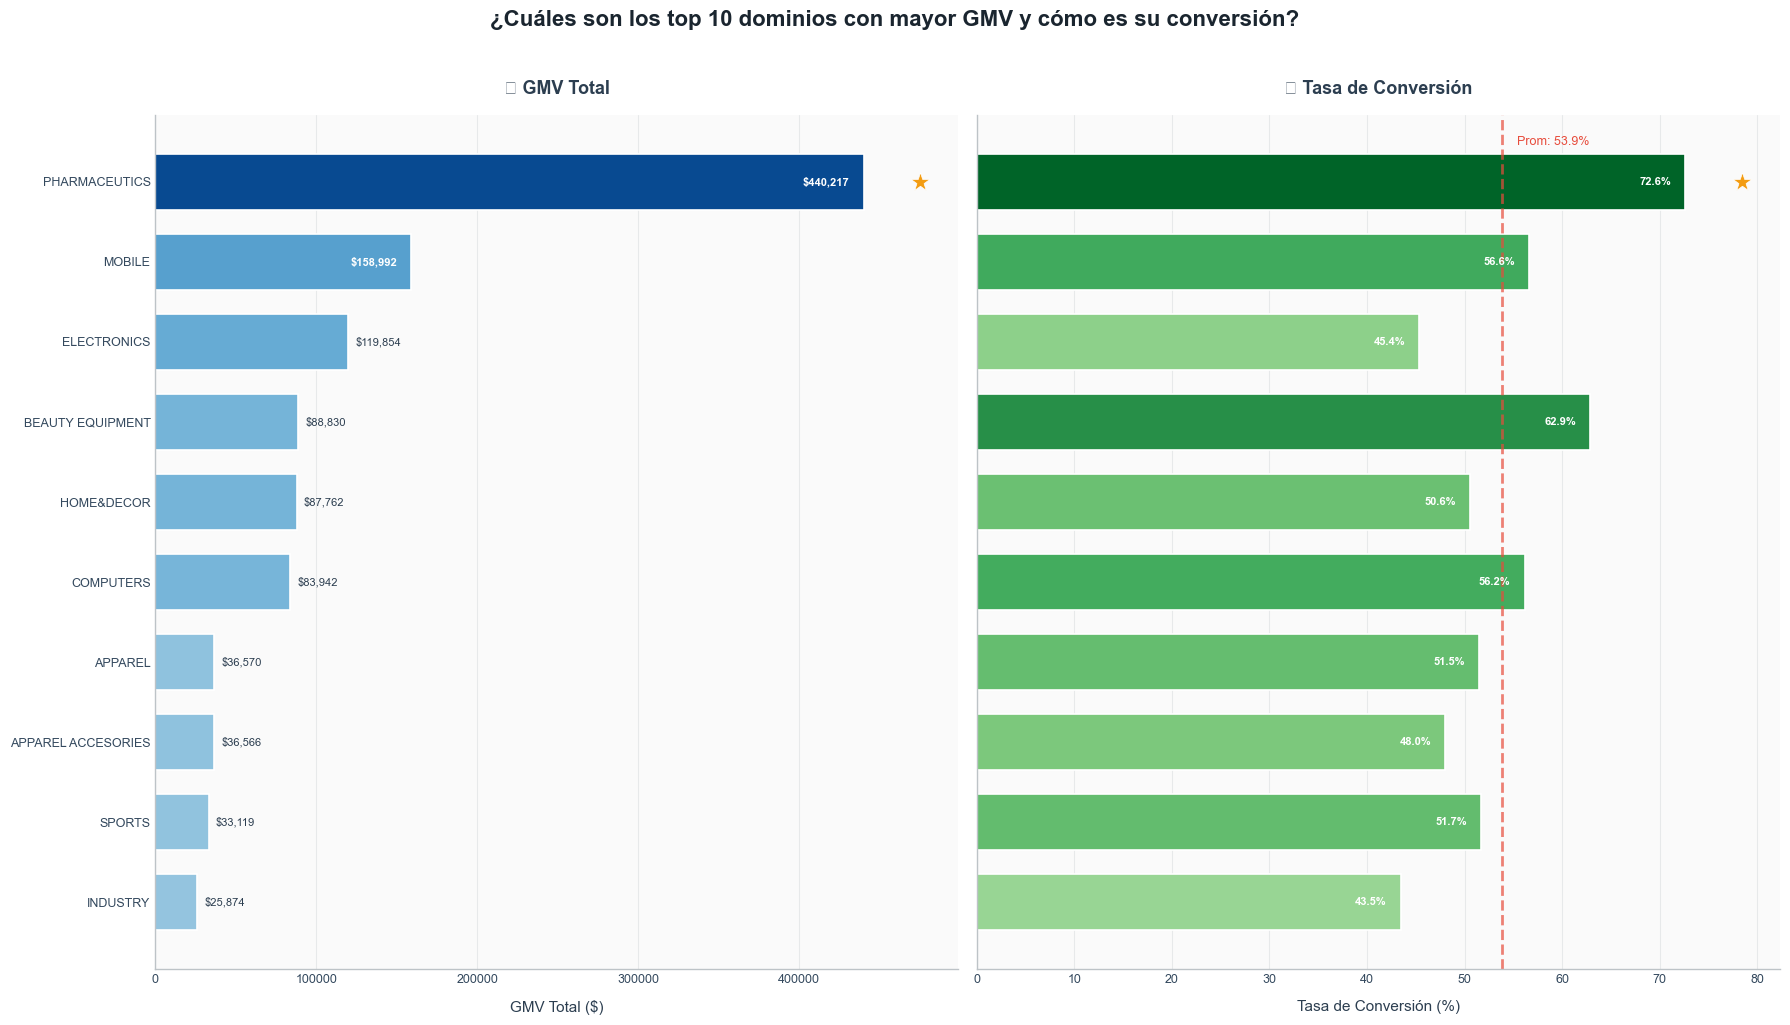


🏆 TOP 10 DOMINIOS POR GMV
GMV de top 10: $1,111,725 (88.3% del total)
🟢 Con buena conversión (≥50%): 7
🔴 Con baja conversión (<50%):  3
------------------------------------------------------------
📋 Detalle:
   1. PHARMACEUTICS: $440,217 | 🟢 72.6%
   2. MOBILE: $158,992 | 🟢 56.6%
   3. ELECTRONICS: $119,854 | 🔴 45.4%
   4. BEAUTY EQUIPMENT: $88,830 | 🟢 62.9%
   5. HOME&DECOR: $87,762 | 🟢 50.6%
   6. COMPUTERS: $83,942 | 🟢 56.2%
   7. APPAREL: $36,570 | 🟢 51.5%
   8. APPAREL ACCESORIES: $36,566 | 🔴 48.0%
   9. SPORTS: $33,119 | 🟢 51.7%
   10. INDUSTRY: $25,874 | 🔴 43.5%


,total_ofertas,tasa_conversion,tasa_sellout,gmv_total,unidades_vendidas,sell_through_rate
DOM_DOMAIN_AGG1,,,,,,
PHARMACEUTICS,3035,0.73,0.15,"440,216.74","147,697.00",0.33
MOBILE,1841,0.57,0.10,"158,992.21","5,511.00",0.22
ELECTRONICS,3018,0.45,0.07,"119,853.95","5,157.00",0.18
BEAUTY EQUIPMENT,1099,0.63,0.10,"88,830.25","24,300.00",0.25
HOME&DECOR,6742,0.51,0.09,"87,761.65","18,269.00",0.21
COMPUTERS,3770,0.56,0.14,"83,941.78","11,165.00",0.28
APPAREL,3856,0.51,0.06,"36,569.90","7,845.00",0.18
APPAREL ACCESORIES,4387,0.48,0.06,"36,565.63","7,654.00",0.18
SPORTS,3289,0.52,0.10,"33,118.70","7,626.00",0.23


In [16]:
# 3.4 Gráfico de top dominios
AnalisisCategoria.plot_top_domains(df, top_n=10)
# 3.3 Top 20 Dominios por GMV
AnalisisCategoria.get_domain_performance(df, top_n=10)

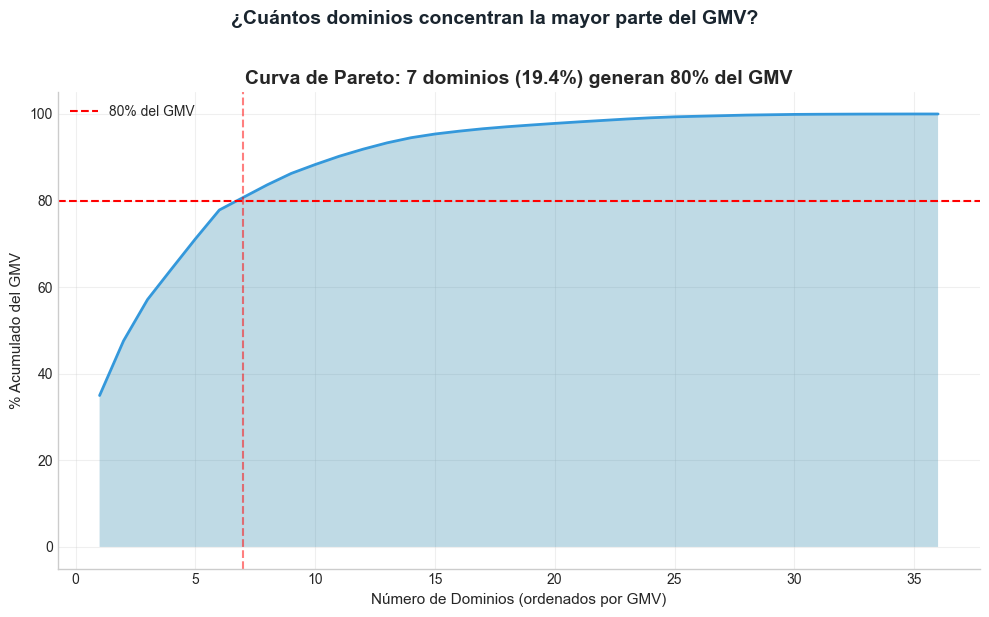


📊 ANÁLISIS DE PARETO - CONCENTRACIÓN DE GMV
Total de dominios: 36
------------------------------------------------------------
📈 80% del GMV:  7 dominios (19.4% del total)
📈 90% del GMV:  11 dominios (30.6% del total)
🏆 Top 10:       88.3% del GMV total
------------------------------------------------------------
💡 INSIGHT: Alta concentración indica dependencia de pocos dominios


In [17]:
# 3.6 Curva de Pareto
AnalisisCategoria.plot_pareto_curve(df)
# si queremos obtener los dominios:
#AnalisisCategoria.get_pareto_analysis(df)

In [18]:
# 3.7 Dominios problemáticos (<30% éxito)
AnalisisCategoria.get_problematic_domains(df, min_offers=20, max_success_rate=0.3)

,ventas_ok,total_ofertas,tasa_exito,stock_comprometido
DOM_DOMAIN_AGG1,,,,
BABY,174,801,0.22,17843
WHEELS & TIRES,10,36,0.28,227
MUSICAL INSTRUMENTS,7,27,0.26,311


---

# TEMÁTICA 4: Pricing, GMV y Velocidad

## Preguntas:
- ¿Cuál es el ticket promedio por categoría?
- ¿El precio afecta la performance?
- ¿Cuáles son las métricas de velocidad de venta?

In [19]:
# 4.1 Ticket promedio por vertical: Ofertas Exitosas vs Zombies
ticket_exitosas, ticket_zombies = AnalisisPricing.get_ticket_by_category_split(df)

print("🟢 OFERTAS EXITOSAS (con ventas)")
display(ticket_exitosas)
print()
print("🔴 OFERTAS ZOMBIES (sin ventas)")
display(ticket_zombies)

🟢 OFERTAS EXITOSAS (con ventas)


,ticket_promedio,ticket_mediano,ticket_std,num_ofertas
VERTICAL,,,,
CE,19.49,5.32,45.96,4529
T & B,9.01,4.78,15.59,781
HOME & INDUSTRY,7.27,4.21,11.54,5379
OTHERS,7.16,4.22,7.95,119
ACC,6.65,3.58,7.00,1309
APP & SPORTS,6.10,4.26,6.80,6649
BEAUTY & HEALTH,6.04,3.04,13.18,4428
ENTERTAINMENT,5.83,4.13,5.07,178
CPG,4.12,2.84,4.51,1207



🔴 OFERTAS ZOMBIES (sin ventas)


,num_ofertas
VERTICAL,
APP & SPORTS,6592
HOME & INDUSTRY,5632
CE,4100
BEAUTY & HEALTH,2722
T & B,1843
CPG,1507
ACC,1264
ENTERTAINMENT,347
OTHERS,160


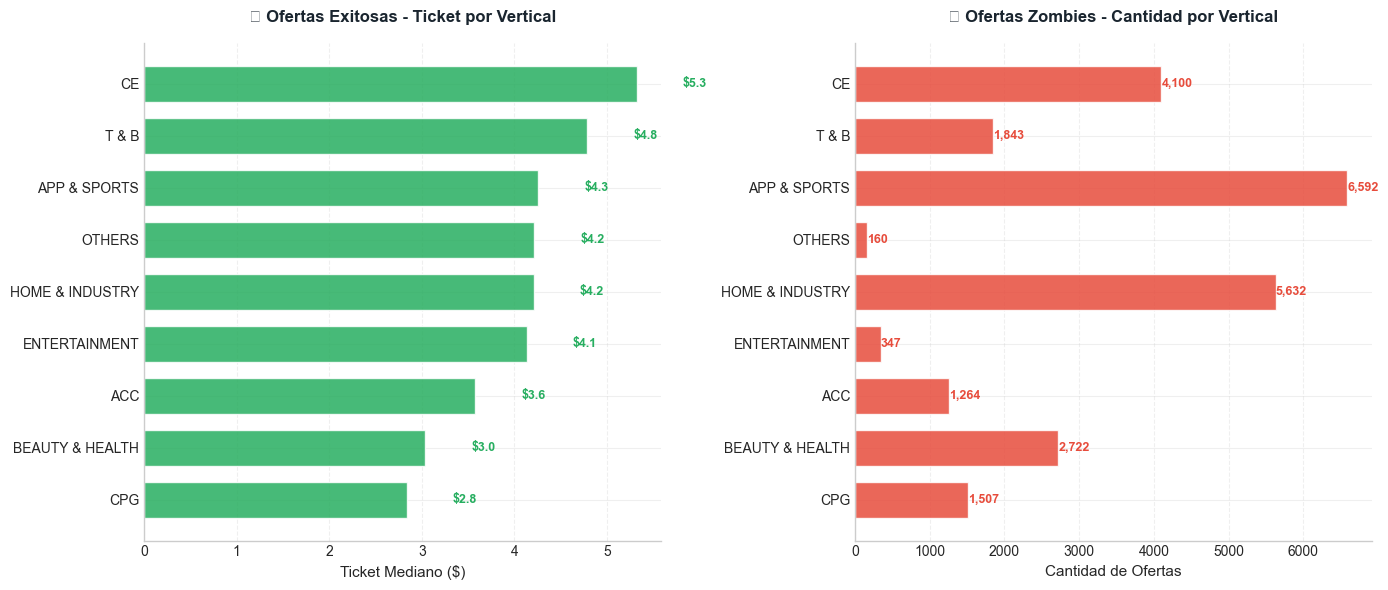


📊 RESUMEN: OFERTAS POR VERTICAL
   🟢 Ofertas Exitosas: 24,579  (ticket mediano: $3.99)
   🔴 Ofertas Zombies:  24,167  (sin precio disponible)

   ℹ️  Nota: No hay columna ORIGINAL_PRICE en el dataset para comparar precios de zombies


In [20]:
# 4.2 Gráfico de ticket por vertical: Ofertas Exitosas vs Zombies
AnalisisPricing.plot_ticket_by_vertical_split(df)

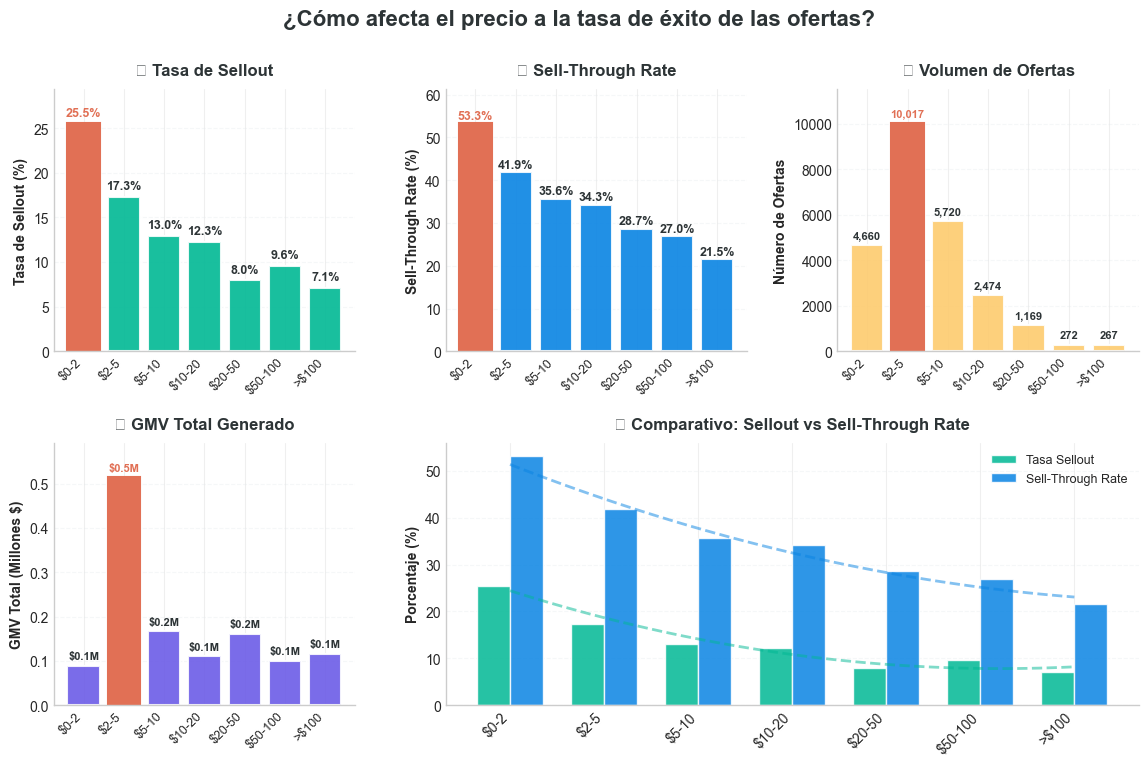


╔════════════════════════════════════════════════════════════════════╗
║                 💵 PERFORMANCE POR RANGO DE TICKET                  ║
╠════════════════════════════════════════════════════════════════════╣
║ 🏆 Mayor sellout:      $0-2 (25.5%)                                 ║
║ 📈 Mayor sell-through: $0-2 (53.3%)                                 ║
║ 📊 Rango más común:    $2-5 (10,017 ofertas)                        ║
║ 💰 Mayor GMV:          $2-5 ($515,013)                              ║
╠════════════════════════════════════════════════════════════════════╣
║  Rango        Ofertas    Sellout        STR        GMV Total  ║
╠────────────────────────────────────────────────────────────────────╣
║  $0-2           4,660     25.5%     53.3% $        89,593  ║
║  $2-5          10,017     17.3%     41.9% $       515,013  ║
║  $5-10          5,720     13.0%     35.6% $       166,494  ║
║  $10-20         2,474     12.3%     34.3% $       110,321  ║
║  $20-50         1,169      8.0%     28.7

In [21]:
# 4.4 Gráfico de ticket vs performance
AnalisisPricing.plot_ticket_vs_performance(df)

**Conclusión del negocio: Las Ofertas Relámpago funcionan mejor para productos de bajo ticket. Los productos caros tienen menor tracción en este formato.**

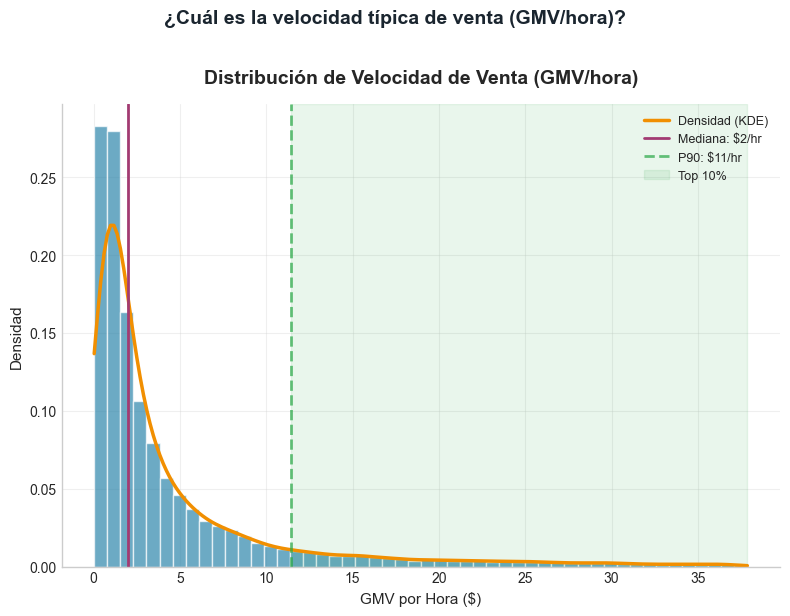


⚡ VELOCIDAD DE VENTA (GMV/HORA)
Ofertas analizadas: 24,579
------------------------------------------------------------
💰 GMV/hora promedio:  $9.29
💰 GMV/hora mediana:   $2.14
📈 GMV/hora P90:       $17.80
📉 GMV/hora P10:       $0.47
------------------------------------------------------------
📦 Unidades/hora promedio: 1.81
📦 Unidades/hora mediana:  0.50


In [22]:
# 4.6 Gráfico de distribución de velocidad
AnalisisVelocidad.plot_velocity_distribution(df)

**Conclusión principal: La mayoría de las ofertas relámpago tienen un rendimiento bajo en términos de velocidad de venta. Existe un grupo pequeño de ofertas "estrella" que performa muy por encima del promedio, sugiriendo que hay factores diferenciadores (categoría, precio, descuento, timing, etc.) que podrían explicar el éxito y replicarse.**

---

# TEMÁTICA 5: Stock y Operaciones

## Preguntas:
- ¿Cuál es el stock óptimo para comprometer?
- ¿Qué tan grave es el problema de sobreventas?

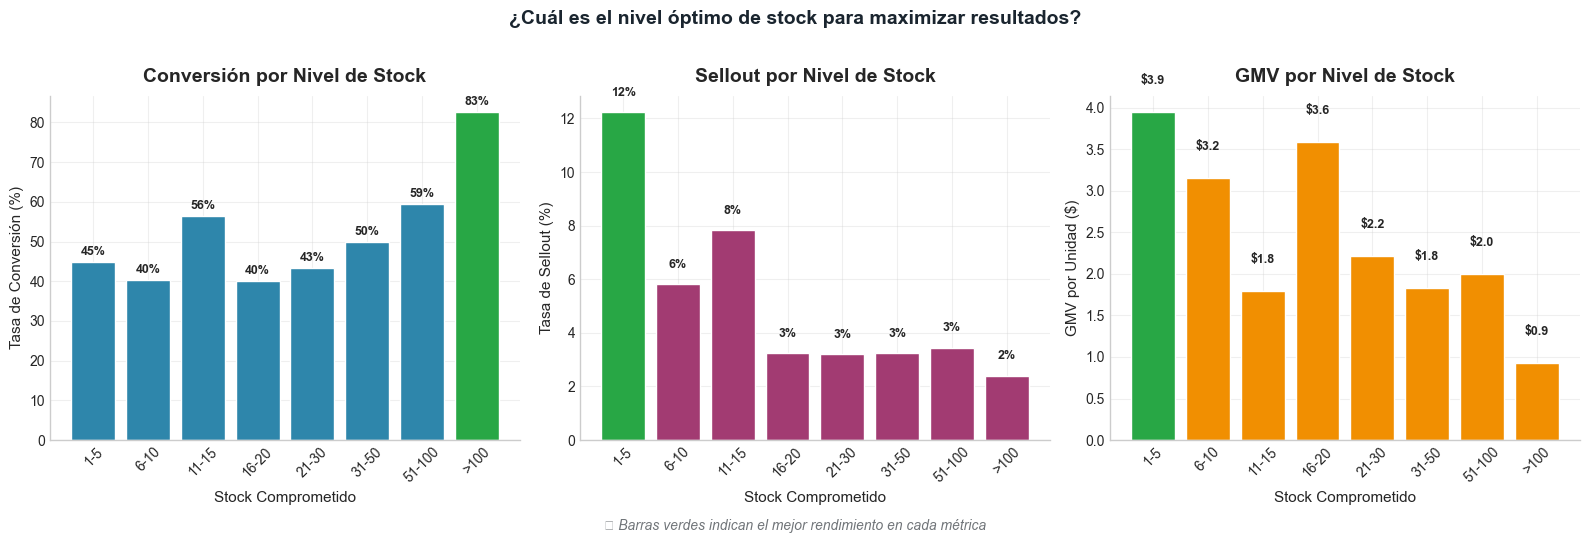


📦 PERFORMANCE POR NIVEL DE STOCK
🏆 Mejor conversión:   Stock >100 (82.6%)
🎯 Mayor sellout:      Stock 1-5 (12.2%)
💰 Mayor GMV/unidad:   Stock 1-5 ($3.94/unidad)
------------------------------------------------------------
📋 Resumen por nivel:
Stock           Ofertas   Conversión    Sellout   GMV/Unidad
------------------------------------------------------------
1-5              19,613       44.9%     12.2% $      3.94
6-10              5,005       40.3%      5.8% $      3.16
11-15            17,545       56.4%      7.8% $      1.80
16-20             1,110       40.0%      3.2% $      3.59
21-30             1,028       43.4%      3.2% $      2.22
31-50             1,236       50.0%      3.2% $      1.83
51-100            1,248       59.5%      3.5% $      2.00
>100              1,961       82.6%      2.4% $      0.93


In [23]:
# 5.2 Gráfico de stock performance
AnalisisStock.plot_stock_performance(df)

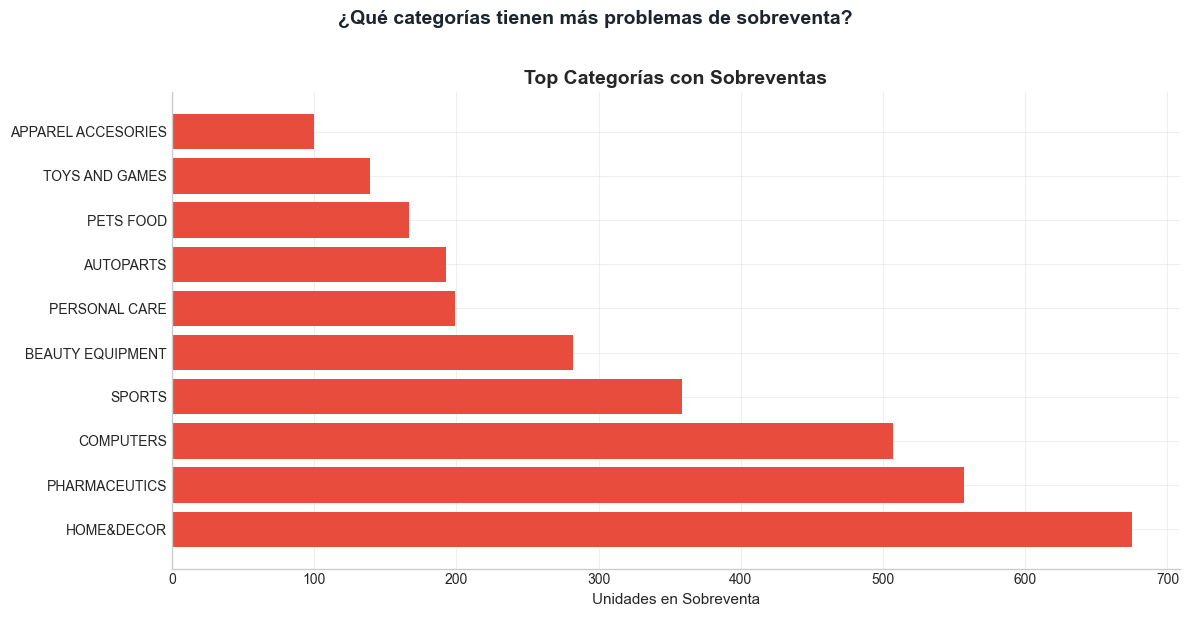


⚠️ ANÁLISIS DE SOBREVENTAS (OVERSELL)
Total ofertas con oversell:  1,273 (2.6%)
Unidades sobrevendidas:      3,817
GMV en riesgo:               $60,311
Ticket promedio oversell:    $2.97
------------------------------------------------------------
📋 Top 10 categorías con más unidades sobrevendidas:
   1. HOME&DECOR: 675 unidades
   2. PHARMACEUTICS: 557 unidades
   3. COMPUTERS: 507 unidades
   4. SPORTS: 359 unidades
   5. BEAUTY EQUIPMENT: 282 unidades
   6. PERSONAL CARE: 199 unidades
   7. AUTOPARTS: 193 unidades
   8. PETS FOOD: 167 unidades
   9. TOYS AND GAMES: 139 unidades
   10. APPAREL ACCESORIES: 100 unidades


In [24]:
# 5.4 Gráfico de sobreventas por categoría
AnalisisStock.plot_oversell_by_category(df)

---

# TEMÁTICA 6: Estrategia e Impacto

## Preguntas:
- ¿El envío gratis mejora las ventas?
- ¿Cuál es el riesgo operativo por overselling?

In [25]:
# 6.1 Impacto del Free Shipping
AnalisisEnvio.get_shipping_performance(df)

,total_ofertas,tasa_conversion,tasa_sellout,gmv_total,gmv_promedio,sell_through_rate,ticket_promedio
Sin Free Shipping,22088,0.58,0.12,"510,127.38",39.71,0.27,2.56
Con Free Shipping,26658,0.44,0.06,"748,536.12",63.79,0.16,15.72


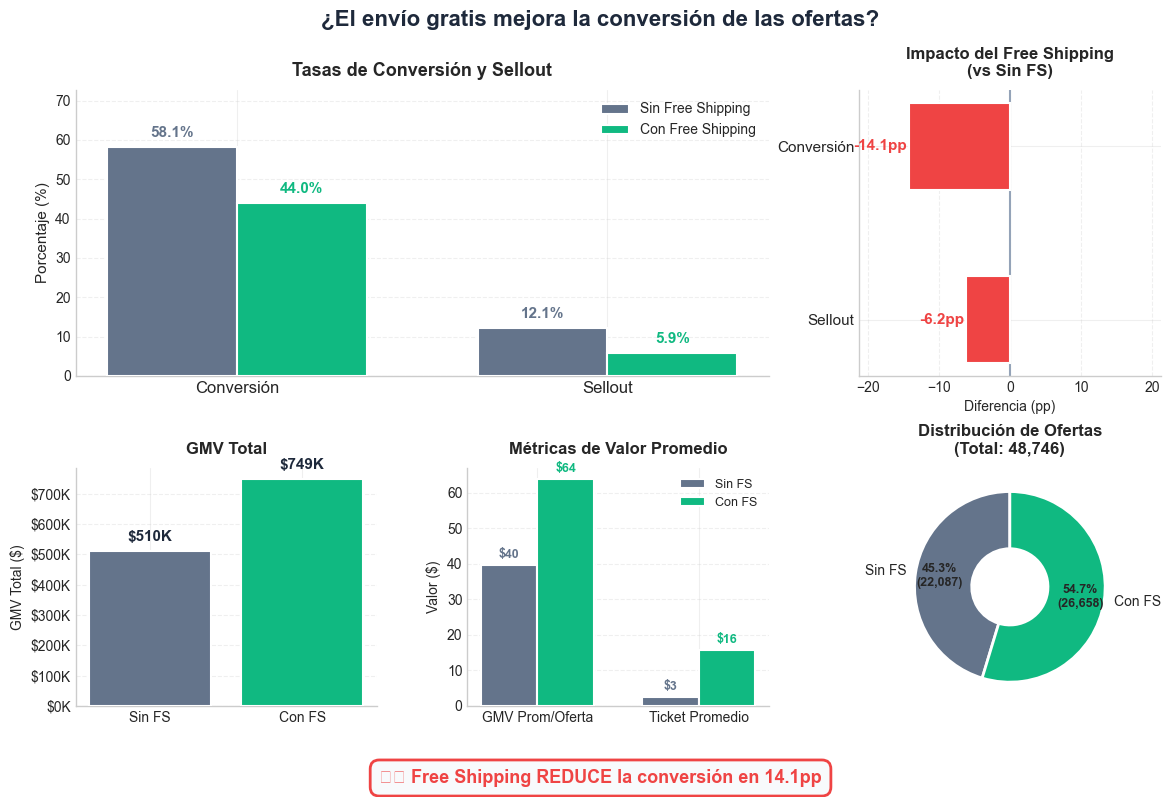


🚚 IMPACTO DEL FREE SHIPPING
Métrica                            Sin FS          Con FS   Diferencia
----------------------------------------------------------------------
Ofertas                            22,088          26,658
Tasa Conversión                    58.1%          44.0%       -14.1pp
Tasa Sellout                       12.1%           5.9%        -6.2pp
GMV Total                 $       510,127 $      748,536
GMV Promedio              $            40 $           64
Ticket Promedio           $             3 $           16
Sell-through Rate                  27.2%          16.1%
----------------------------------------------------------------------
⚠️ Free Shipping REDUCE la conversión en 14.1 puntos porcentuales


In [26]:
# 6.2 Gráfico de comparación de envío
AnalisisEnvio.plot_shipping_comparison(df)

**El free shipping genera mas GMV total y tiene tickets mas altos, suigiere que Free shipping aplica a productos de mayor valor, por ende tienen menor conversion... Como conclusion el Free shipping realmente no daña la conversion**

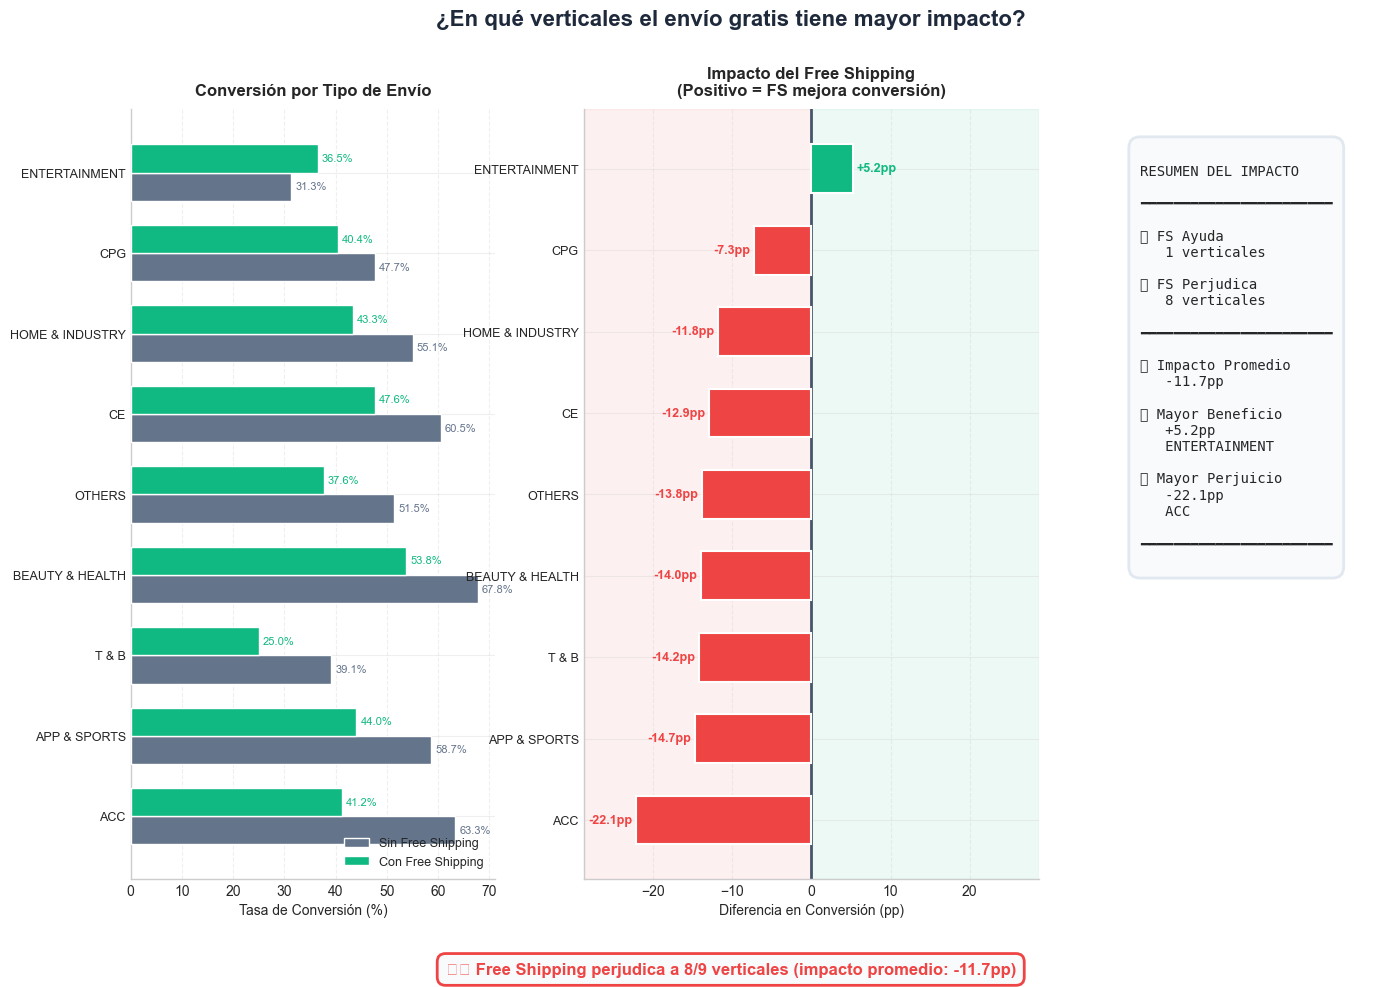


🚚 EFECTO FREE SHIPPING POR VERTICAL
Verticales donde FS ayuda:      1
Verticales donde FS perjudica:  8
Impacto promedio:               -11.7pp
----------------------------------------------------------------------
Vertical                        Sin FS       Con FS    Diff (pp)
----------------------------------------------------------------------
ENTERTAINMENT                   31.3%       36.5% 🟢      +5.2
CPG                             47.7%       40.4% 🔴      -7.3
HOME & INDUSTRY                 55.1%       43.3% 🔴     -11.8
CE                              60.5%       47.6% 🔴     -12.9
OTHERS                          51.5%       37.6% 🔴     -13.8
BEAUTY & HEALTH                 67.8%       53.8% 🔴     -14.0
T & B                           39.1%       25.0% 🔴     -14.2
APP & SPORTS                    58.7%       44.0% 🔴     -14.7
ACC                             63.3%       41.2% 🔴     -22.1
----------------------------------------------------------------------
PROMEDIO           

In [27]:
# 6.4 Gráfico de FS por vertical
AnalisisEnvio.plot_shipping_by_vertical(df)

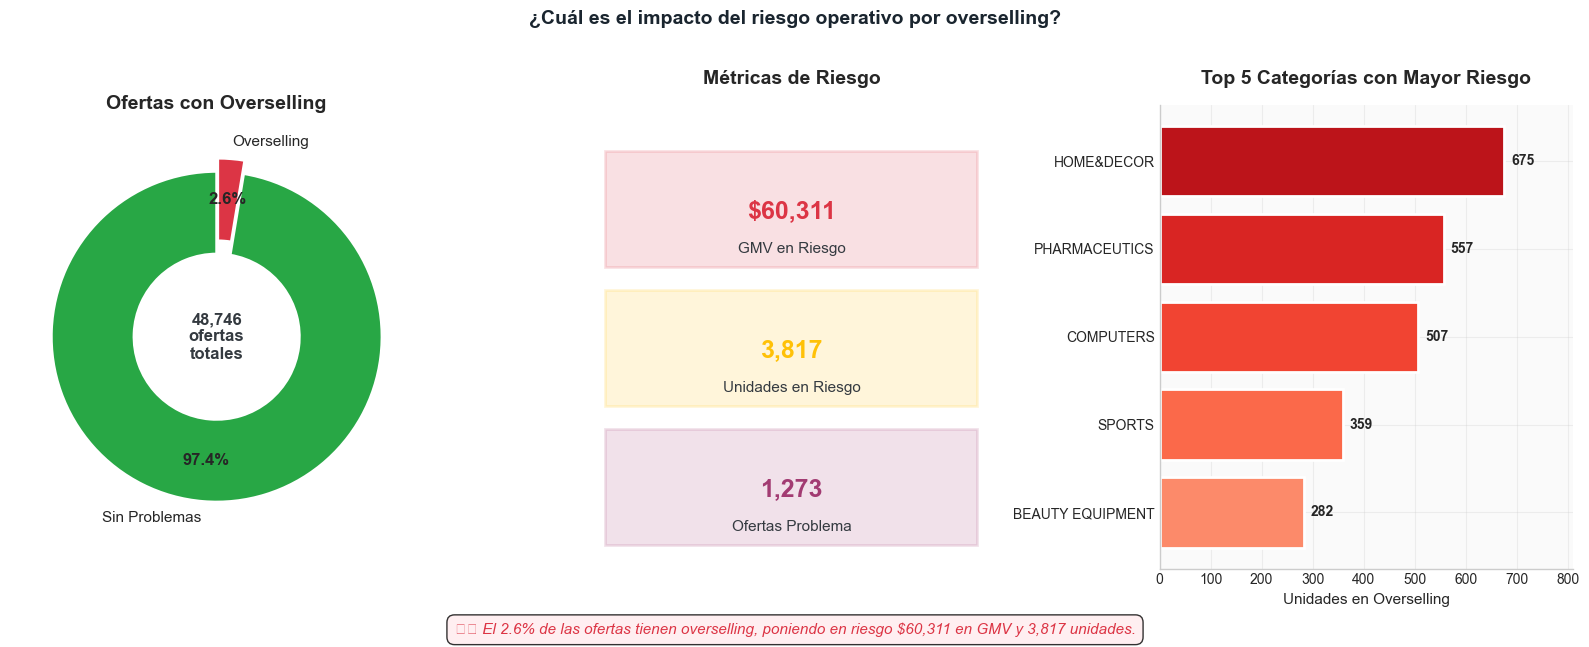


⚠️  RIESGO OPERATIVO POR OVERSELLING
Ofertas con problema:  1,273 (2.6%)
GMV en riesgo:         $60,311
Unidades en riesgo:    3,817
------------------------------------------------------------
Top categorías afectadas:
  • HOME&DECOR: 675 unidades
  • PHARMACEUTICS: 557 unidades
  • COMPUTERS: 507 unidades
  • SPORTS: 359 unidades
  • BEAUTY EQUIPMENT: 282 unidades


In [28]:
# 6.14 Riesgo operativo
AnalisisNegocio.plot_operational_risk(df)

**Conclusión final: El overselling es un problema manejable (2.6%), pero las categorías afectadas son de alto valor. El riesgo de $60K y 3,817 unidades justifica implementar mejores controles de inventario, especialmente en HOME&DECOR.**